numpy -> Manipulação de dados matriciais \
matplotlib -> Visualização de dados através de gráficos \
seaborn -> Uma camada sobre o matplotlib que permite a criação de gráficos mais complexos \
sklearn -> Biblioteca scikit-learn; fornece ferramentas para a criação de classificadores e métricas para análise dos mesmos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import sys
import sklearn.model_selection
import sklearn.neighbors
import sklearn.svm
import sklearn.ensemble

In [ ]:
# Forçar o numpy a não usar notação ciêntifica ao imprimir valores numéricos
np.set_printoptions(precision = 50, suppress = True)

# Leitura dos Ficheiros

In [ ]:
# Caminhos para os ficheiros do nosso problema. Abrir "Ficheiros" no separador na barra laterar
# esquerda, esperar por ligação a um runtime e carregar os ficheiros para esse separador.
caminho_nomes = 'house_attributes.npy'
caminho_dados = 'house_data.npy'

In [ ]:
# Função auxiliar para abertura de ficheiros com matrizes de numpy, o qual é devolvido pela função.
def abrir_ficheiro_npy(caminho):
    with open(caminho, 'rb') as ficheiro_nomes:
        return np.load(ficheiro_nomes, allow_pickle=True)

In [ ]:
# Atribuir cada matriz a uma variável.
atributos_casas = abrir_ficheiro_npy(caminho_nomes)
dados_casas = abrir_ficheiro_npy(caminho_dados)

In [ ]:
# Imprimir as dimensões da matriz com os dados para o nosso problema.
print(dados_casas.shape)

(4328, 13)


In [ ]:
# Imprimir as dimensões do vetor com os nomes dos atributos dos nossos dados.
print(atributos_casas.shape)
# Imprimit o vetor com os respetivos nomes.
atributos_casas

(13,)


array(['quartos', 'wcs', 'espaco_habitavel', 'espaco_total', 'andares',
       'mar', 'vista', 'condicao', 'espaço_acima_de_terra', 'espaço_cave',
       'ano_de_construcao', 'ano_de_renovaçao', 'acima_de_450k'],
      dtype='<U21')

In [ ]:
# Confirmar o número de entradas dos nossos dados com valor de mercado abaixo de 450k.
abaixo_de_450k = dados_casas[dados_casas[:, -1] == 0]
len(abaixo_de_450k)

2172

In [ ]:
# Confirmar o número de entradas dos nossos dados com valor de mercado acima de 450k.
acima_de_450k = dados_casas[dados_casas[:, -1] == 1]
len(acima_de_450k)

2156

# Visualizar Dados

In [ ]:
# Imprimit o vetor com os respetivos nomes dos atributos.
print(atributos_casas)

['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'waterfront'
 'view' 'condition' 'sqft_above' 'sqft_basement' 'yr_built' 'yr_renovated'
 'above450k']


---


```
# Nome do atributo
nome_atributo = atributos_casas[:, <coluna>]
# Gráfico de dispersão
plt.scatter(np.ones(len(<coluna_a_visualizar>), <coluna_a_visualizar>))
plt.xlabel('Número de Entrada')
plt.ylabel(nome_atributo)
```



Text(0, 0.5, 'espaco_habitavel')

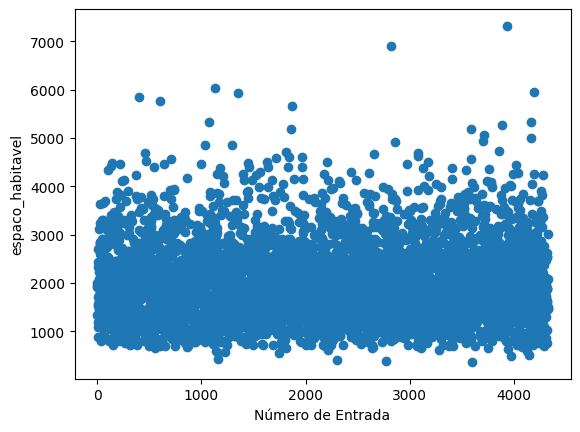

In [ ]:
# Visualização rápida de um dado atributo dos nossos dados com a ajuda
# de um gráfico de dispersão. Neste caso, a distribuição do espaço habitável
# pelas entradas dos nossos dados.
nome_atributo = atributos_casas[2]
coluna_dados = dados_casas[:, 2]

plt.scatter([i for i in range(len(coluna_dados))], coluna_dados)
plt.xlabel('Número de Entrada')
plt.ylabel(nome_atributo)

---

In [ ]:
# Função auxiliar para visualização de um dado atributo com um gráfico de dispersão.
# dados -> matrix de numpy
# nome_atributo -> nome do atributo a visualizar em "string"
def mostrar_gráfico_dispersão(dados, nome_atributo):
    plt.scatter([i for i in range(len(dados))], dados)
    plt.xlabel('Número de Entrada')
    plt.ylabel(nome_atributo)
    plt.show()

In [1]:
# A mesma função definida acima, mas com a possibilidade de definir limites de visualização
# do gráfico até um dado valor nos dois eixos.
def mostrar_gráfico_dispersão_com_limites(dados, nome_atributo, limite_x, limite_y):
    plt.scatter([i for i in range(len(dados))], dados)
    plt.xlabel('Número de Entrada')
    plt.ylabel(nome_atributo)
    plt.xlim(limite_x)
    plt.ylim(limite_y)
    plt.show()

In [ ]:
# Função auxiliar para visualização de um dado atributo com um histograma.
# dados -> matrix de numpy
# nome_atributo -> nome do atributo a visualizar em "string"
def mostrar_histograma(dados, nome_atributo):
    plt.hist(dados)
    plt.xlabel('Número de Entrada')
    plt.ylabel(nome_atributo)
    plt.show()

In [ ]:
# A mesma função definida acima, mas com a possibilidade de definir limites de visualização
# do gráfico até um dado valor nos dois eixos.
def mostrar_histograma(dados, nome_atributo, limite_x, limite_y):
    plt.hist(dados)
    plt.xlabel('Número de Entrada')
    plt.ylabel(nome_atributo)
    plt.xlim(limite_x)
    plt.ylim(limite_y)
    plt.show()

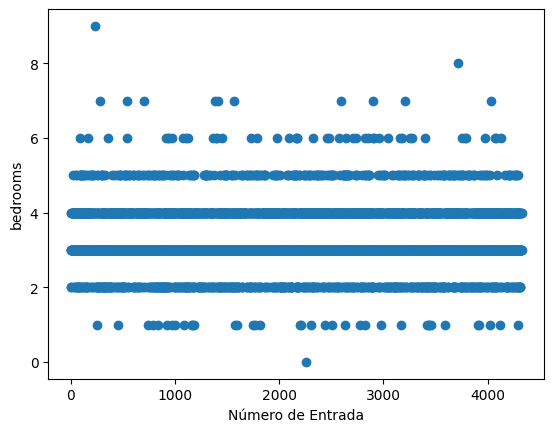

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 0], atributos_casas[0])

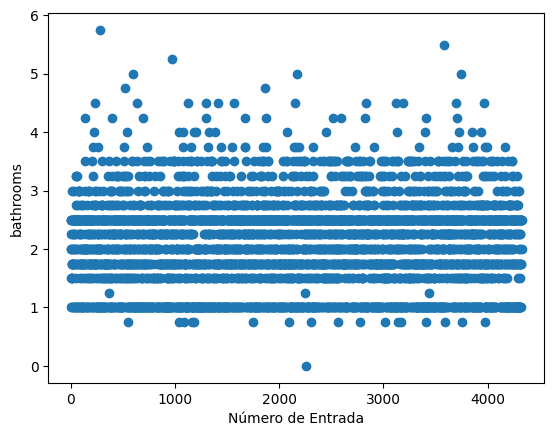

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 1], atributos_casas[1])

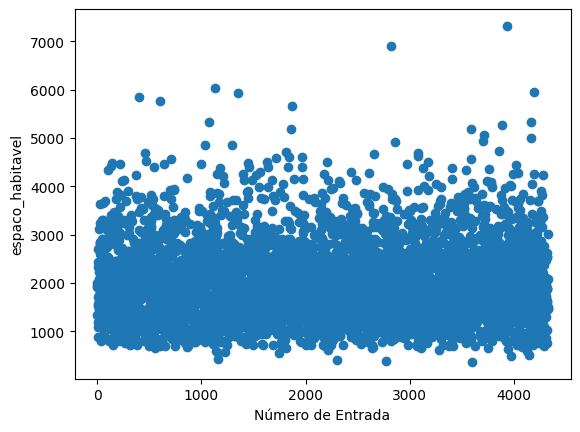

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 2], 'espaco_habitavel')

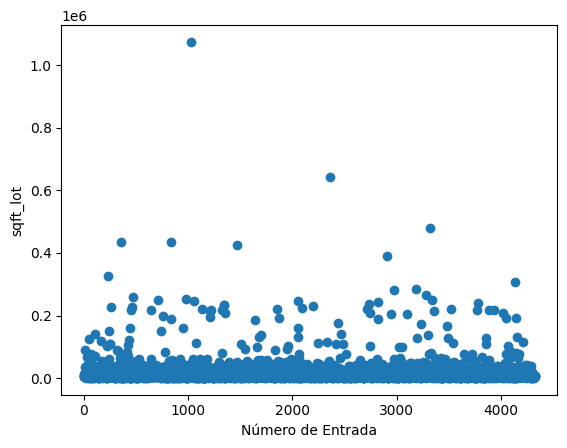

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 3], atributos_casas[3])

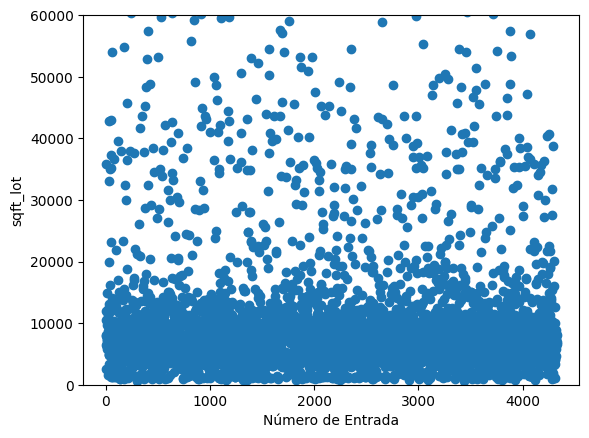

In [ ]:
mostrar_gráfico_dispersão_com_limites(dados_casas[:, 3], atributos_casas[3], limite_x=None, limite_y=(0, 60000))

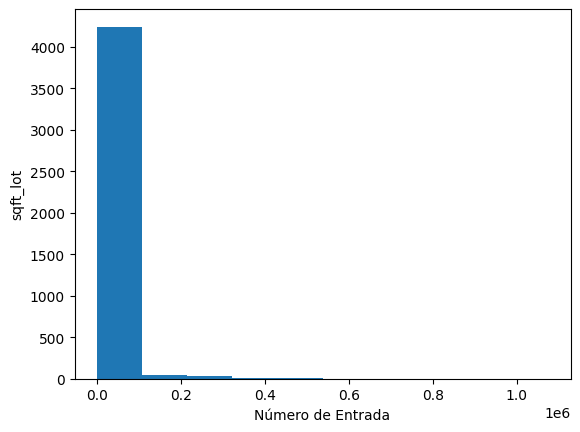

In [ ]:
mostrar_histograma(dados_casas[:, 3], atributos_casas[3])

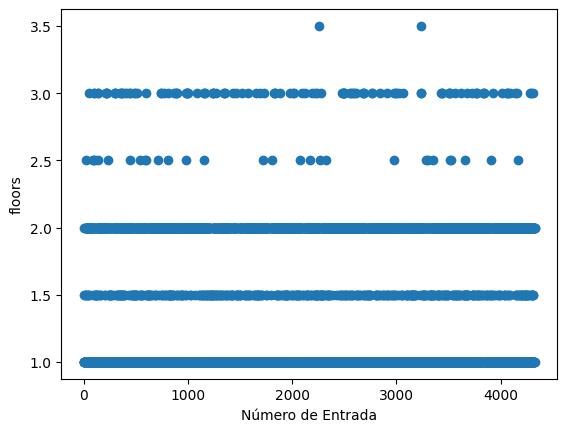

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 4], atributos_casas[4])

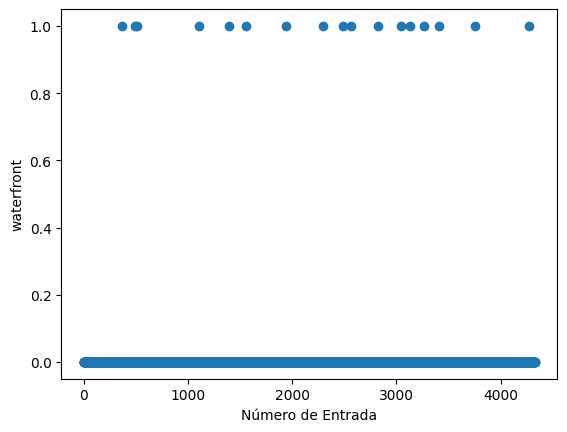

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 5], atributos_casas[5])

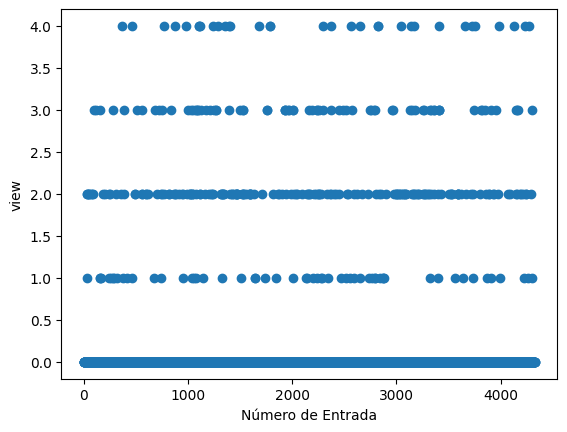

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 6], atributos_casas[6])

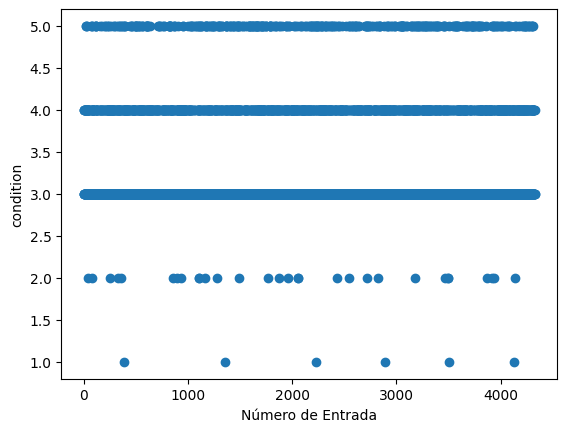

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 7], atributos_casas[7])

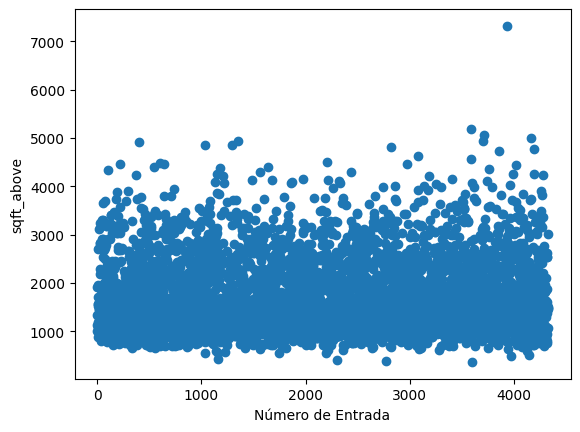

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 8], atributos_casas[8])

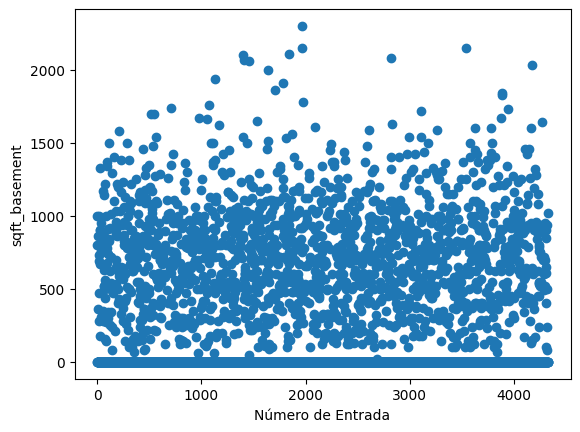

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 9], atributos_casas[9])

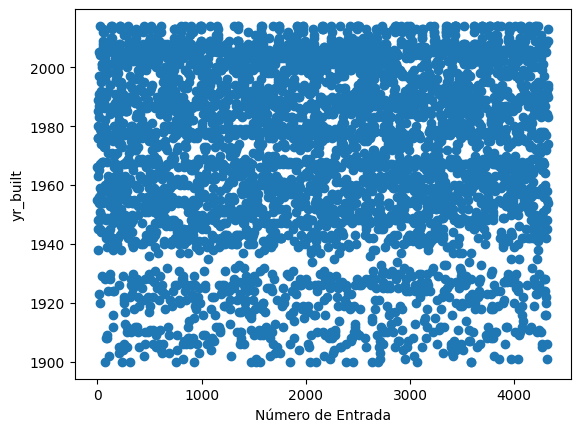

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 10], atributos_casas[10])

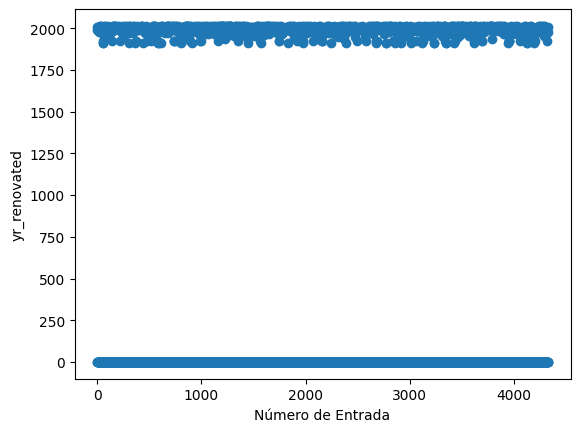

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 11], atributos_casas[11])

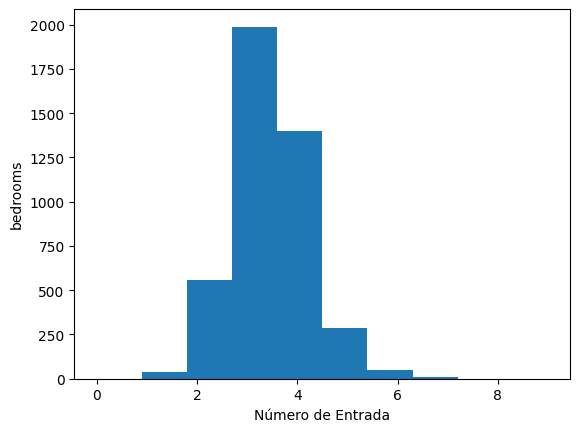

In [ ]:
mostrar_histograma(dados_casas[:, 0], atributos_casas[0])

### Exercício Prático de Como Selecionar Info Com Base em Condições
Aqui deixo quatro formas diferentes de selecionar e imprimir o número de entradas cujo número de quartos e casas de banho é igual a 2.

In [ ]:
# Ciclo for com condições aninhadas
casas_2_quartos_2_wc = []

for casa in dados_casas:
    numero_de_quartos = casa[0]
    numero_de_casas_de_banho = casa[1]
    if numero_de_quartos == 2:
        if numero_de_casas_de_banho == 2:
            casas_2_quartos_2_wc.append(casa)

print(len(casas_2_quartos_2_wc))

41


In [ ]:
# Ciclo for com condições compostas
casas_2_quartos_2_wc = []

for casa in dados_casas:
    if casa[0] == 2 and casa[1] == 2:
        casas_2_quartos_2_wc.append(casa)

print(len(casas_2_quartos_2_wc))

41


In [ ]:
# Compreensão de listas com condições compostas
casas_2_quartos_2_wc = np.array([casa for casa in dados_casas[:, :] if casa[0] == 2 and casa[1] == 2])
print(len(casas_2_quartos_2_wc))

41


In [ ]:
# Seleção de entradas com recurso apenas a numpy
casas_2_quartos_2_wc = []

numero_de_quartos = dados_casas[:, 0]

casas_2_quartos_2_wc = dados_casas[numero_de_quartos == 2]

numero_de_casas_de_banho = casas_2_quartos_2_wc[:, 1]

casas_2_quartos_2_wc = casas_2_quartos_2_wc[numero_de_casas_de_banho == 2]
print(len(casas_2_quartos_2_wc))

41


In [ ]:
# Exemplo de função para selecionar entradas com x número de quartos e y número de wcs
# Valores default de 2 para ambos x e y
def casas_com_x_quartos_y_wc(n_quartos=2, n_wc=2):
    casas_x_quartos_x_wc = []

    for casa in dados_casas:
        numero_de_quartos = casa[0]
        numero_de_casas_de_banho = casa[1]
        if numero_de_quartos == n_quartos:
            if numero_de_casas_de_banho == n_wc:
                casas_2_quartos_2_wc.append(casa)

    return casas_x_quartos_x_wc

### Mesmo exercício, mas com intervalos
Exemplos de como selecionar entradas com base em intervalos definidos, 1000 a 3000 de espaço habitável, ou semi-definidos, ano de construção superior a 2000.

In [ ]:
# Exemplo com condições aninhadas
casas_1000_3000_espaco_ano_2000_para_cima = []

for casa in dados_casas:
    espaco_habitavel = casa[3]
    ano_de_construcao = casa[10]
    # Intervalo inferior de espaço habitável
    if espaco_habitavel > 1000
        # Intervalo superior de espaço habitável
        if espaco_habitavel < 3000:
            # Intervalo inferior de ano de construção
            if ano_de_construcao > 2000:
                casas_1000_3000_espaco_ano_2000_para_cima.append(casa)

print(len(casas_1000_3000_espaco_ano_2000_para_cima))

235


In [ ]:
# Seleção de entradas com recurso apenas a numpy
casas_1000_3000_espaco_ano_2000_para_cima = []

espaco_habitavel = dados_casas[:, 3]

casas_1000_3000_espaco_ano_2000_para_cima = dados_casas[espaco_habitavel > 1000]

espaco_habitavel = casas_1000_3000_espaco_ano_2000_para_cima[:, 3]

casas_1000_3000_espaco_ano_2000_para_cima = casas_1000_3000_espaco_ano_2000_para_cima[espaco_habitavel < 3000]

ano_de_construcao = casas_1000_3000_espaco_ano_2000_para_cima[:, 10]

casas_1000_3000_espaco_ano_2000_para_cima = casas_1000_3000_espaco_ano_2000_para_cima[ano_de_construcao > 2000]

In [ ]:
print(len(casas_1000_3000_pes_ano_2000_para_cima))

235


# Limpeza dos Dados

In [ ]:
atributos_casas

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'above450k'], dtype=object)

### Casas de Banho

In [ ]:
casas_de_banho = dados_casas[:, 1]

In [ ]:
# Número de entradas com menos do que 1 casa de banho.
# Consideramos estes valores como outliers.
print(len(dados_casas[np.where(casas_de_banho<1)]))

18


In [ ]:
# Alterar entradas com menos do que 1 casa de banho para 1 casa de banho.
dados_casas[np.where(casas_de_banho<1), 1] = 1

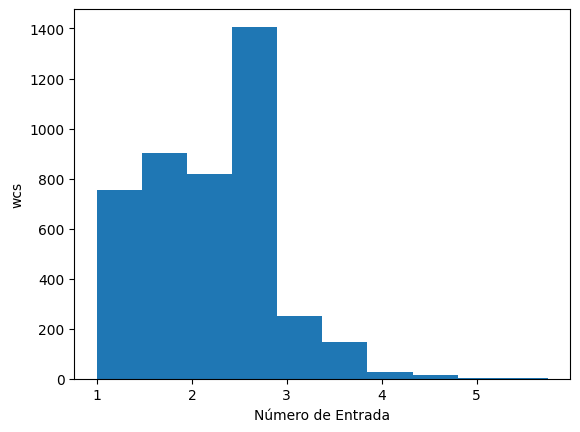

In [ ]:
mostrar_histograma(dados_casas[:, 1], atributos_casas[1])

#### Exercício: indique quantas entradas contam com mais do que 5 casas de banho e altere essas entradas para exatamente 5 casas de banho.

In [ ]:
print(len(dados_casas[np.where(casas_de_banho >= 5)]))

6


In [ ]:
dados_casas[np.where(casas_de_banho>=5), 1] = 5

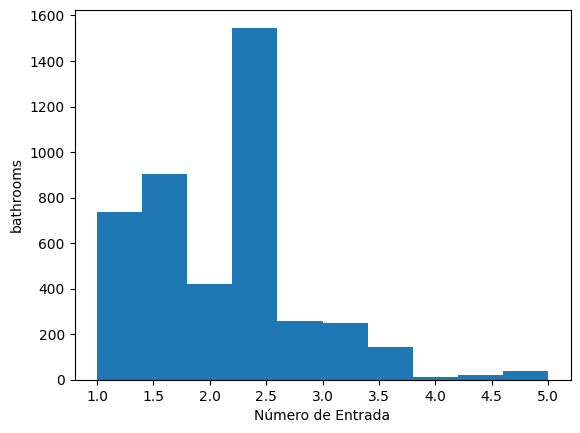

In [ ]:
mostrar_histograma(dados_casas[:, 1], atributos_casas[1])

### Espaço Habitável

In [ ]:
# Selecionar e atribuir valores do atributo espaço habitável para todas as entradas a uma variável.
espaco_habitavel = dados_casas[:, 2]

In [ ]:
# Imprimir o número de entradas cujo espaço habitável é maior ou igual a 5000.
# Consideramos estes valores como outliers.
print(len(dados_casas[np.where(espaco_habitavel>=5000)]))

15


In [ ]:
# Calcular a média do espaço habitável.
# É uma opção para valores contínuos. Para valores discretos (1, 2, 3, ...)
# considerar opções usadas para as casas de banho. A mediana pode ser uma boa
# opção para ambos os casos.
media_espaco_habitavel = np.mean(dados_casas[:, 2])

In [ ]:
# Imprimier a média calculada acima.
print(media_espaco_habitavel)

2035.3994916820702

In [ ]:
# Substrituir os outliers definidos acima pela média do atributo espaço habitável.
dados_casas[np.where(espaco_habitavel>=5000), 2] = media_espaco_habitavel

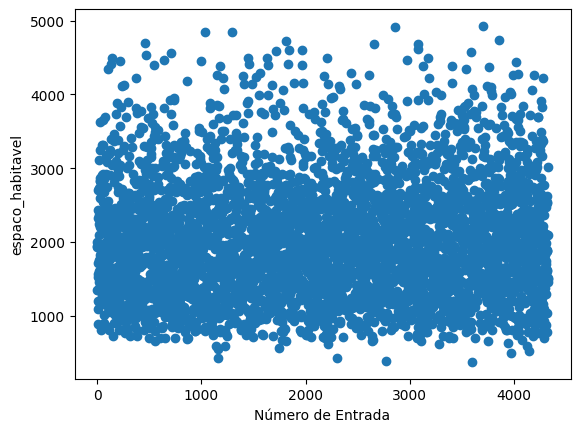

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 2], atributos_casas[2])

#### Exercício: Substituir os valores de espaço habitável abaixo de 500 para a mediana deste atributo.

In [ ]:
print(len(dados_casas[np.where(espaco_habitavel<500)]))

5


In [ ]:
mediana_espaco_habitavel = np.median(dados_casas[:, 2])

In [ ]:
print(mediana_espaco_habitavel)

1920.0


In [ ]:
dados_casas[np.where(espaco_habitavel<500), 2] = mediana_espaco_habitavel

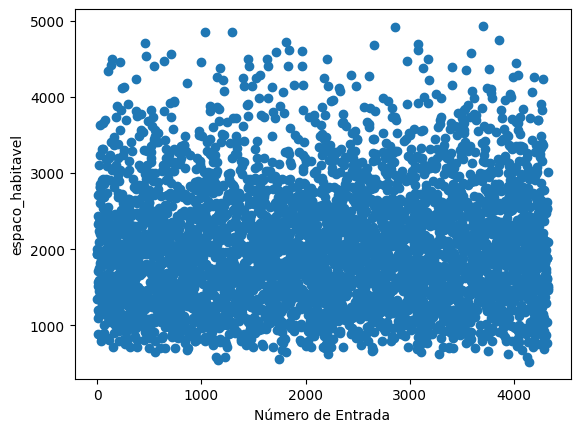

In [ ]:
mostrar_gráfico_dispersão(dados_casas[:, 2], atributos_casas[2])

### Normalização
Não realizada neste workshop. Ver https://scikit-learn.org/stable/modules/preprocessing.html#normalization para uma introdução à normalização.

# Análise Crítica dos Dados

In [ ]:
atributos_casas

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'above450k'], dtype=object)

In [ ]:
# Criar matriz de 0s vazia para o número de atributos em questão.
# Como temos 13, a matriz deverá ter 13x13 de dimensão.
corr_matrix = np.zeros((13, 13))

In [ ]:
# Iterar sobre todos os atributos dos nossos dados, 13 neste caso.
for i in range(0, 13):
    # Iterar novamente sobre todos os atributos dos nossos dados, 13 neste caso.
    for j in range(0, 13):
        # Cálculo da matriz de correlação entre o atributo i e j atuais.
        # Isto irá garantir que a correlação será calculada entre todos os
        # atributos, incluindo os mesmo atributo quando i==j. Neste caso,
        # o valor de correlação é 1.
        curr_corr = np.corrcoef(dados_casas[:, i], dados_casas[:, j])
        # Introduzir o valor da correlação calculado na posição respetiva
        # da matriz de 0s.
        corr_matrix[i, j] = curr_corr[0, 1]

In [ ]:
# Confirmar dimensão da matriz.
corr_matrix.shape

(13, 13)

<Axes: >

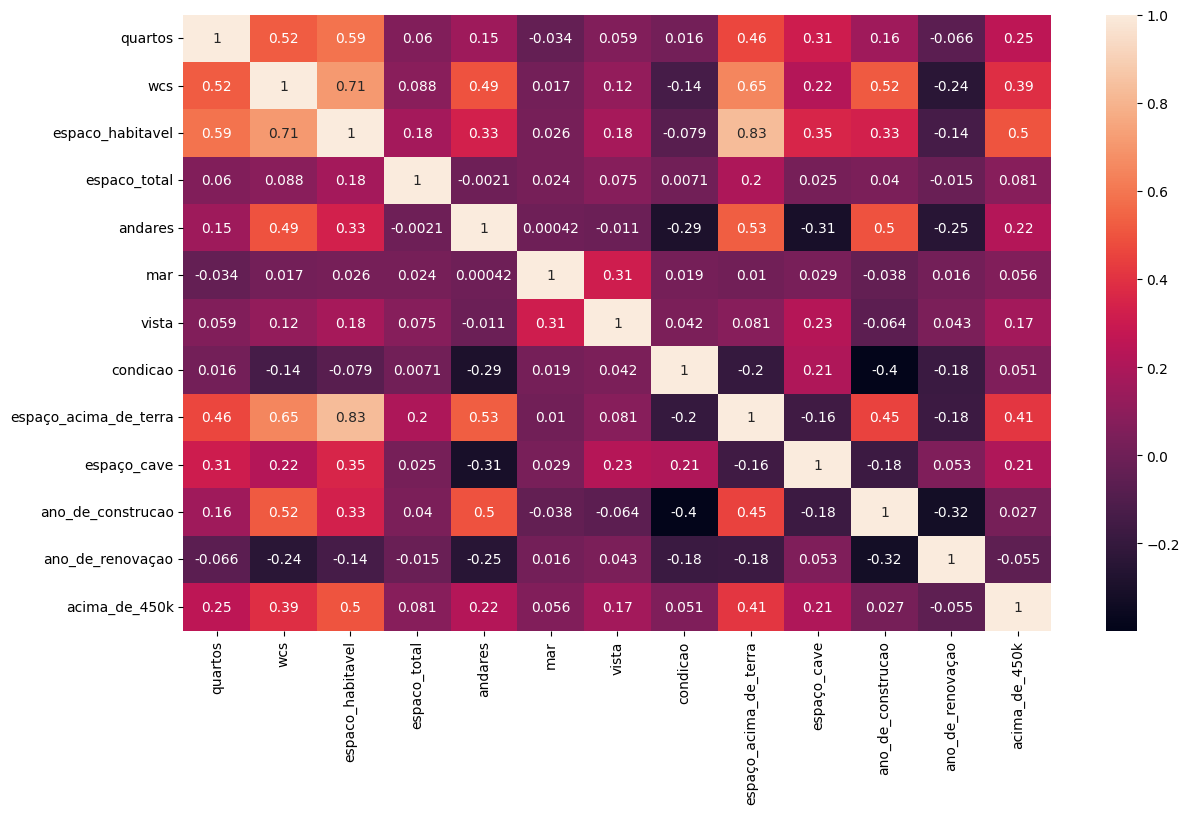

In [ ]:
# Visualizar a matriz de correlação completa com a ajuda da função heatmap da função seaborn.
plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, annot=True,
            xticklabels=atributos_casas, yticklabels=atributos_casas)

# Escolha de Atributos

In [ ]:
# Escolha dos atributos com correlação mais interessante entre estes e
# o atributo a prever. Este é um passo subjetivo, pelo que estes foram os
# atributos mais relevantes na perspetiva do orador.
# Atributos: quartos, wcs,
#   espaco_habitavel, andares, espaco_cave
dados_para_classificador = dados_casas[:, [0, 1, 2, 4, -3]]
dados_para_classificador.shape

(4328, 5)

In [ ]:
# Selecionar apenas os valores do atributo a prever.
objetivo_para_classificador = dados_casas[:, -1]
objetivo_para_classificador.shape

(4328,)

# Construção de Classificadores

### Split Dos Dados

In [ ]:
# Separação das entradas em dados de treino, para otimização dos classificadores, e teste,
# para avaliação dos classificadores. O valor default do split é 80% para treino e 20% para
# teste, mas pode ser alterado. Dependendo da saturação dos dados, valores de treino menores
# podem ser benéficos.
split = sklearn.model_selection.train_test_split(
    dados_para_classificador, objetivo_para_classificador)

Dados de treino

In [ ]:
split[0].shape

(3246, 5)

Objetivos de treino

In [ ]:
split[1].shape

(1082, 5)

Dados de teste

In [ ]:
split[2].shape

(3246,)

Objetivos de teste

In [ ]:
split[3].shape

(1082,)

### KNN Classifier

In [ ]:
# Criação de um classificador K-Nearest Neighbours com valores default do scikit-learn.
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform', leaf_size=30, p=2)

.fit -> treinar o modelo\
.predict -> prever classes

In [ ]:
knn.fit(split[0], split[2])
predictions_knn = knn.predict(split[1])

In [2]:
# Calcular a precisão do nosso classificador.
sklearn.metrics.accuracy_score(split[3], predictions_knn)

NameError: name 'sklearn' is not defined

### Support Vector Machine Classifier

In [ ]:
# Criação de um classificador Support Vector Machine com valores default do scikit-learn.
svm = sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale')

In [ ]:
svm.fit(split[0], split[2])

SVC()

In [ ]:
predictions_svm = svm.predict(split[1])

In [ ]:
# Calcular a precisão do nosso classificador.
sklearn.metrics.accuracy_score(split[3], predictions_svm)

0.7125693160813309

### Random Forests

In [ ]:
# Criação de um classificador Random Forest com valores default do scikit-learn.
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)

In [ ]:
rf.fit(split[0], split[2])

RandomForestClassifier()

In [ ]:
predictions_rf = rf.predict(split[1])

In [ ]:
# Calcular a precisão do nosso classificador.
sklearn.metrics.accuracy_score(split[3], predictions_svm)

0.7181146025878004

# Métricas de Avaliação

### Matriz de Confusão

In [ ]:
# Função auxiliar para cáculo da matriz de confusão para as previsões do nosso classificador.
# Ver explicação desta nos slides disponibilizados no repositório de apoio.
# Esta matriz é muito importante para analisar a viabilidade dos nossos classificadores dependendo
# do problema em mãos.
def matriz_de_confusao(classes_reais, classes_previstas):
    TP, TN, FP, FN = 0, 0, 0, 0

    for real, prevista in zip(classes_reais, classes_previstas):
        if real == 0:
            if prevista == 0:
                TN = TN + 1
            else:
                FP = FP + 1
        else:
            if prevista == 0:
                FN = FN + 1
            else:
                TP = TP + 1

    return TP, FP, FN, TN

In [ ]:
# Atribuição dos valores referentes à matriz de confusão a variáveis.
TP_SVM, FP_SVM, FN_SVM, TN_SVM = matriz_de_confusao(split[3], predictions_svm)

In [ ]:
# Organização da matriz de confusão para visualização.
matriz_svm = np.array([[TP_SVM, FP_SVM], [FN_SVM, TN_SVM]])

In [ ]:
# Confirmar dimensões da matriz de confusão.
matriz_svm.shape

(2, 2)

In [ ]:
# Visualização da matriz de confusão organizada acima.
sns.heatmap(matriz_svm, annot=True, fmt='g',
            xticklabels=[1, 0], yticklabels=[1, 0], cmap='Blues')
plt.xlabel('Classe Real')
plt.ylabel('Classe Prevista')

## Exemplos de métricas para avaliação dos classificadores muito utilizadas em Ciência de Dados. Ver slides disponibilizados no repositório de apoio para uma explicação.

### Especificidade e Sensibilidade

In [ ]:
def especificidade(TN, FP):
    return TN/(TN + FP)

In [ ]:
def sensibilidade(TP, FN):
    return TP/(TP + FN)

### Precisão, Exatidão e F1 score

In [ ]:
def precisao(TP, FP):
    return TP/(TP + FP)

In [ ]:
def exatidao(TP, FN):
    return TP/(TP + FN)

In [ ]:
def f1_score(valor_precisao, valor_exatidao):
    return 2 * (
         (valor_precisao * valor_exatidao)
          / (valor_precisao + valor_exatidao) )

### Cálculos

In [ ]:
print(especificidade(TN_SVM, FP_SVM))

0.7552816901408451


In [ ]:
print(sensibilidade(TP_SVM, FN_SVM))

0.6770428015564203


In [ ]:
print(precisao(TP_SVM, FP_SVM))

0.7145790554414785


In [ ]:
# Mesma coisa que sensibilidade, é só um nome diferente
print(exatidao(TP_SVM, FN_SVM))

0.6770428015564203


In [ ]:
print(f1_score(precisao(TP_SVM, FP_SVM),
               exatidao(TP_SVM, FN_SVM)))

0.6953046953046954
